<a href="https://colab.research.google.com/github/shreyanknp/DA1/blob/main/Exercise_Day_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate Synthetic Data
np.random.seed(42)
X, y = make_classification(n_samples=1200, n_features=30, n_informative=15, n_redundant=10, random_state=42)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Tree Models
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
#dt_accuracy = dt_model.score(X_test,y_test)
#print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Gradient Boosted Trees
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)

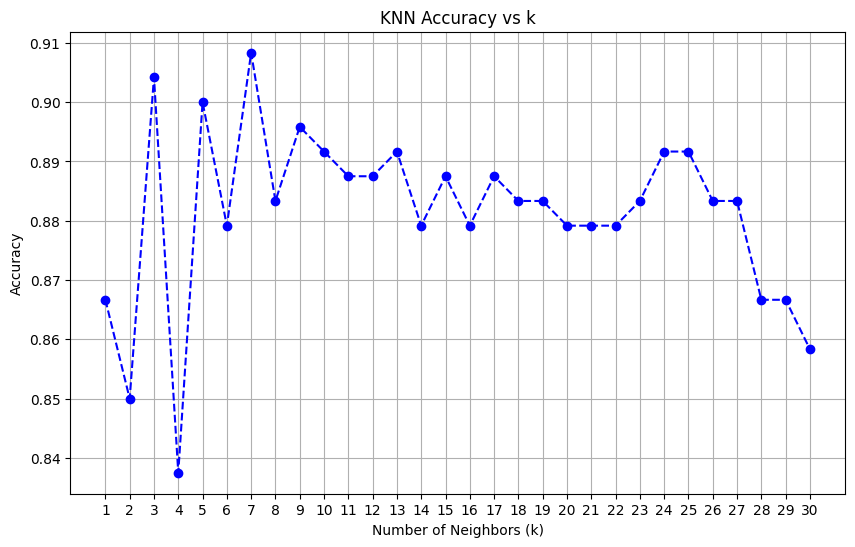

In [2]:
# 2. KNN Model
# Find the optimal k
knn_scores = []
k_values = range(1, 31)

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    knn_pred = knn_model.predict(X_test_scaled)
    knn_scores.append(accuracy_score(y_test, knn_pred))

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k')
plt.xticks(ticks=k_values)
plt.grid()
plt.show()

# Choose optimal k
optimal_k = k_values[np.argmax(knn_scores)]
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

In [3]:
# 3. Evaluation Metrics
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} Metrics:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")
    print("-" * 50)

# Evaluate all models
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("Gradient Boosted Trees", y_test, gb_pred)
evaluate_model(f"KNN (k={optimal_k})", y_test, knn_pred)

Decision Tree Metrics:
Accuracy: 0.7417, Precision: 0.7480, Recall: 0.7480, F1-Score: 0.7480
--------------------------------------------------
Random Forest Metrics:
Accuracy: 0.8833, Precision: 0.9060, Recall: 0.8618, F1-Score: 0.8833
--------------------------------------------------
Gradient Boosted Trees Metrics:
Accuracy: 0.8833, Precision: 0.8862, Recall: 0.8862, F1-Score: 0.8862
--------------------------------------------------
KNN (k=7) Metrics:
Accuracy: 0.9083, Precision: 0.9174, Recall: 0.9024, F1-Score: 0.9098
--------------------------------------------------


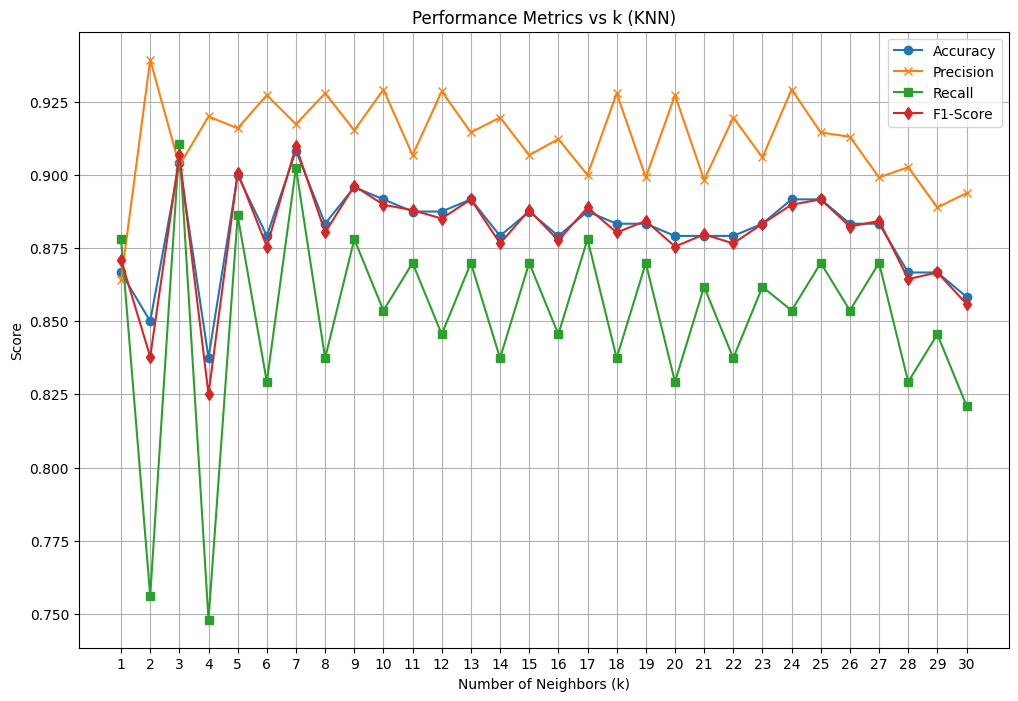

In [4]:
# 4. Optimal k for KNN
# Visualize performance metrics for varying k
knn_precisions = []
knn_recalls = []
knn_f1_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    knn_pred = knn_model.predict(X_test_scaled)
    knn_precisions.append(precision_score(y_test, knn_pred))
    knn_recalls.append(recall_score(y_test, knn_pred))
    knn_f1_scores.append(f1_score(y_test, knn_pred))

plt.figure(figsize=(12, 8))
plt.plot(k_values, knn_scores, label='Accuracy', marker='o')
plt.plot(k_values, knn_precisions, label='Precision', marker='x')
plt.plot(k_values, knn_recalls, label='Recall', marker='s')
plt.plot(k_values, knn_f1_scores, label='F1-Score', marker='d')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Performance Metrics vs k (KNN)')
plt.xticks(ticks=k_values)
plt.legend()
plt.grid()
plt.show()